# Import Libraries

In [79]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Reading Data by using pandas

In [2]:
df=pd.read_csv("/kaggle/input/breast-canser/Breast_Cancer.csv")

# Explore Data

### Reading first 5 rows

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


### Displaying the Shape of the DataFrame

In [12]:
df.shape

(4023, 16)

### Listing the Column Names of the DataFrame

In [13]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

### Summary of DataFrame Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

### Summary of DataFrame Information

In [5]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

### Counting the Number of Duplicated Rows in the DataFrame

In [6]:
df.duplicated().sum()

1

### Removing Duplicated Rows from the DataFrame

In [7]:
df=df.drop_duplicates()

### Counting the Number of Duplicated Rows in the DataFrame

In [9]:
df.duplicated().sum()

0

### Generating Descriptive Statistics for the DataFrame

In [11]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### Counting the Frequency of Each Unique Value in the 'Status' Column

In [29]:
status_counts=df["Status"].value_counts()
status_counts

Status
0    3407
1     616
Name: count, dtype: int64

### Visualizing Status Distribution with Bar and Pie Charts

In [30]:
bar_plot = px.bar(status_counts, 
                  x=status_counts.index, 
                  y=status_counts.values, 
                  labels={'x': 'Status', 'y': 'Count'}, 
                  title='Status',template="seaborn")

pie_chart = px.pie(values=status_counts.values, 
                   names=status_counts.index, 
                   title='The percentage of living and dead',template="seaborn")


bar_plot.show()
pie_chart.show()



# Transfer Data 

### Initializing the Label Encoder for Categorical Data Encoding

In [19]:
la=LabelEncoder()

### Extracting Object Type Columns from the DataFrame

In [22]:
df_obj=df.select_dtypes(include="object")
df_obj.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive


### Extracting Non-Object Type Columns from the DataFrame

In [23]:
df_non_obj=df.select_dtypes(exclude="object")
df_non_obj.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50


### Encoding Categorical Variables with Label Encoding

In [24]:
for i in range(0,df_obj.shape[1]):
    df_obj.iloc[:,i]=la.fit_transform(df_obj.iloc[:,i])

### Randomly Sampling 5 Rows from Categorical DataFrame

In [25]:
df_obj.sample(5)

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
4009,2,0,2,0,2,0,2,1,1,0,0
4011,2,4,1,1,2,0,2,1,1,1,0
3437,2,1,1,0,1,1,3,1,1,1,1
4016,2,1,1,0,1,3,1,1,1,1,0
3616,2,1,2,2,4,0,2,1,1,0,0


### Summary of Categorical DataFrame Information

In [59]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Race                 4023 non-null   object
 1   Marital Status       4023 non-null   object
 2   T Stage              4023 non-null   object
 3   N Stage              4023 non-null   object
 4   6th Stage            4023 non-null   object
 5   differentiate        4023 non-null   object
 6   Grade                4023 non-null   object
 7   A Stage              4023 non-null   object
 8   Estrogen Status      4023 non-null   object
 9   Progesterone Status  4023 non-null   object
 10  Status               4023 non-null   object
dtypes: object(11)
memory usage: 377.2+ KB


### Converting Categorical Data to Integer Type

In [60]:
df_obj=df_obj.astype("int")

### Summary of Categorical DataFrame After Type Conversion

In [61]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Race                 4023 non-null   int64
 1   Marital Status       4023 non-null   int64
 2   T Stage              4023 non-null   int64
 3   N Stage              4023 non-null   int64
 4   6th Stage            4023 non-null   int64
 5   differentiate        4023 non-null   int64
 6   Grade                4023 non-null   int64
 7   A Stage              4023 non-null   int64
 8   Estrogen Status      4023 non-null   int64
 9   Progesterone Status  4023 non-null   int64
 10  Status               4023 non-null   int64
dtypes: int64(11)
memory usage: 377.2 KB


### Combining Categorical and Non-Categorical DataFrames into One

In [63]:
df=pd.concat([df_obj,df_non_obj],axis=1)

### Displaying the First Few Rows of the Combined DataFrame

In [64]:
df.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,2,1,0,0,0,1,3,1,1,1,0,68,4,24,1,60
1,2,1,1,1,2,0,2,1,1,1,0,50,35,14,5,62
2,2,0,2,2,4,0,2,1,1,1,0,58,63,14,7,75
3,2,1,0,0,0,1,3,1,1,1,0,58,18,2,1,84
4,2,1,1,0,1,1,3,1,1,1,0,47,41,3,1,50


### Calculating the Correlation Matrix of the DataFrame

In [65]:
cor=df.corr()
cor

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Race,1.000000,-0.111387,0.001184,-0.032065,-0.025183,-0.018693,-0.057013,0.006990,0.057627,0.034307,-0.050000,0.079646,-0.004019,-0.004713,-0.014543,0.040640
Marital Status,-0.111387,1.000000,0.009230,0.013114,0.002899,0.031582,-0.004301,0.004949,-0.017873,-0.013446,0.033254,0.050927,0.007352,-0.004343,0.005795,-0.025652
T Stage,0.001184,0.009230,1.000000,0.276903,0.606606,-0.031534,0.110183,-0.221114,-0.060894,-0.057526,0.154615,-0.066675,0.809160,0.113955,0.242961,-0.085904
N Stage,-0.032065,0.013114,0.276903,1.000000,0.881879,-0.036360,0.148767,-0.260563,-0.101959,-0.093658,0.255724,0.003042,0.277832,0.328206,0.838058,-0.139696
6th Stage,-0.025183,0.002899,0.606606,0.881879,1.000000,-0.042471,0.169957,-0.291962,-0.105560,-0.101143,0.257566,-0.018485,0.513901,0.317107,0.773944,-0.145038
differentiate,-0.018693,0.031582,-0.031534,-0.036360,-0.042471,1.000000,-0.365479,-0.008952,-0.021783,0.009035,-0.018586,0.015870,-0.028502,-0.057366,-0.028446,-0.004613
Grade,-0.057013,-0.004301,0.110183,0.148767,0.169957,-0.365479,1.000000,-0.043694,-0.186759,-0.175798,0.134152,-0.093176,0.099512,0.083417,0.122906,-0.058445
A Stage,0.006990,0.004949,-0.221114,-0.260563,-0.291962,-0.008952,-0.043694,1.000000,0.065561,0.026513,-0.096571,0.020824,-0.123865,-0.068989,-0.232837,0.070139
Estrogen Status,0.057627,-0.017873,-0.060894,-0.101959,-0.105560,-0.021783,-0.186759,0.065561,1.000000,0.513295,-0.184628,0.059728,-0.059546,-0.044795,-0.085949,0.128522
Progesterone Status,0.034307,-0.013446,-0.057526,-0.093658,-0.101143,0.009035,-0.175798,0.026513,0.513295,1.000000,-0.177039,-0.021387,-0.069812,-0.017977,-0.078004,0.096102


### Visualizing the Correlation Matrix with a Heatmap

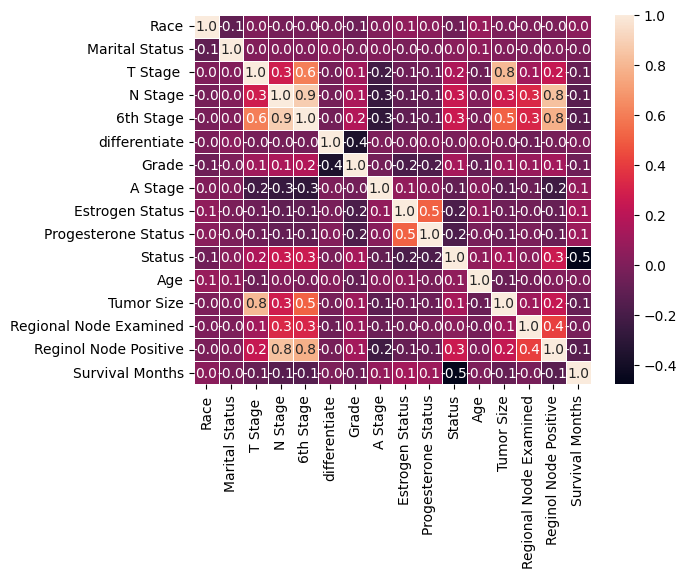

In [66]:
sns.heatmap(cor,annot=True,lw='0.5',fmt="0.1f")

plt.show()

# Create Model

### Separating Features and Target Variable from the DataFrame

In [67]:
x=df.drop(["Status"],axis=1)
y=df["Status"]

### Applying Random Oversampling to Address Class Imbalance

In [80]:
rs=RandomOverSampler(random_state=42)
x_res,y_res=rs.fit_resample(x,y)

### Splitting the Resampled Data into Training and Testing Sets

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=21)
print(f"The Shape Of x_train is {x_train.shape}")
print(f"The Shape Of x_test is {x_test.shape}")
print(f"The Shape Of y_train is {y_train.shape}")
print(f"The Shape Of y_test is {y_test.shape}")

The Shape Of x_train is (5451, 15)
The Shape Of x_test is (1363, 15)
The Shape Of y_train is (5451,)
The Shape Of y_test is (1363,)


### Initializing Multiple Machine Learning Models for Classification

In [82]:
model1=LogisticRegression()

model2=RandomForestClassifier()
model3=GradientBoostingClassifier()

model4=SVC()
model5=XGBClassifier()


### Training and Evaluating a Classification Mode

In [83]:
def models(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(classification_report(y_test,pre))

### Evaluating the Logistic Regression Model

In [84]:
models(model1)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       686
           1       0.82      0.78      0.80       677

    accuracy                           0.81      1363
   macro avg       0.81      0.81      0.81      1363
weighted avg       0.81      0.81      0.81      1363



### Evaluating the Random Forest Classifier Model

In [85]:
models(model2)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       686
           1       0.95      1.00      0.98       677

    accuracy                           0.98      1363
   macro avg       0.98      0.98      0.98      1363
weighted avg       0.98      0.98      0.98      1363



### Evaluating the Gradient Boosting Classifier Model

In [86]:
models(model3)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       686
           1       0.87      0.80      0.83       677

    accuracy                           0.84      1363
   macro avg       0.84      0.84      0.84      1363
weighted avg       0.84      0.84      0.84      1363



### Evaluating the Support Vector Classifier Model

In [87]:
models(model4)

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       686
           1       0.87      0.73      0.79       677

    accuracy                           0.81      1363
   macro avg       0.82      0.81      0.81      1363
weighted avg       0.82      0.81      0.81      1363



### Evaluating the XGBoost Classifier Model

In [88]:
models(model5)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       686
           1       0.93      1.00      0.96       677

    accuracy                           0.96      1363
   macro avg       0.96      0.96      0.96      1363
weighted avg       0.96      0.96      0.96      1363

